In [1]:
import pymatgen as mg
import json
with open ("../../battery_structure_test1.json", "r") as f :
    battery_structure =  json.loads (f.read ())

In [11]:
import pandas as pd
data = pd.DataFrame ()
#data = pd.DataFrame(columns=['entry_id', 'capacity_grav'])
data = pd.DataFrame(columns=['entry_id', 'ave_voltage'])

In [5]:
battery_structure[0][0]['adj_pairs'][0]['structure']['structure']

{'lattice': {'a': 5.482576,
  'c': 18.035336,
  'b': 6.825777,
  'matrix': [[5.482576, 0.0, 0.0],
   [0.0, 6.825777, 0.0],
   [0.0, 0.0, 18.035336]],
  'volume': 674.9335144232207,
  'beta': 90.0,
  'gamma': 90.0,
  'alpha': 90.0},
 'sites': [{'abc': [0.77409, 0.54976, 0.31215],
   'xyz': [4.24400725584, 3.7525391635200003, 5.6297301324],
   'label': 'P',
   'species': [{'occu': 1, 'element': 'P'}]},
  {'abc': [0.72591, 0.45024, 0.81215],
   'xyz': [3.97985674416, 3.07323783648, 14.647398132400001],
   'label': 'P',
   'species': [{'occu': 1, 'element': 'P'}]},
  {'abc': [0.27409, 0.95024, 0.68785],
   'xyz': [1.50271925584, 6.48612633648, 12.4056058676],
   'label': 'P',
   'species': [{'occu': 1, 'element': 'P'}]},
  {'abc': [0.22591, 0.04976, 0.18785],
   'xyz': [1.23856874416, 0.33965066352, 3.3879378676],
   'label': 'P',
   'species': [{'occu': 1, 'element': 'P'}]},
  {'abc': [0.75846, 0.91129, 0.45531],
   'xyz': [4.15831459296, 6.220262322330001, 8.211668834160001],
   'label':

In [12]:
%%time
import pymatgen as mg
i = 0
j = 0
while i  < len(battery_structure):    
    if battery_structure[i][0]['working_ion']=='Na':
        data.loc [j, 'entry_id'] = battery_structure[i][0]['adj_pairs'][0]['structure']['entry_id']
        data.loc[j, 'ave_voltage']=battery_structure [i][0]['average_voltage']
        j = j + 1
    i = i + 1

Wall time: 351 ms


In [13]:
voltage = data ['ave_voltage']

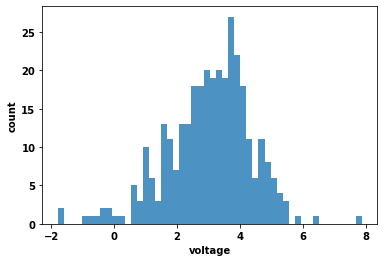

In [14]:
import matplotlib.pyplot as plt
plt_figure=plt.hist(voltage, bins = 50, alpha = 0.8)
plt.xlabel("voltage")
plt.ylabel("count")
plt.savefig("hist.png")
plt.show()

In [15]:
vmean=data['ave_voltage'].mean()
vstd = data['ave_voltage'].std()

In [16]:
up = vmean+2*vstd
dw = vmean-2*vstd

In [17]:
up, dw, vmean, vstd

(5.688581349126013, 0.35890355219541226, 3.0237424506607122, 1.33241944923265)

In [18]:
data = data[data['ave_voltage']< up]
data = data[data['ave_voltage']> dw]

In [19]:
data

,entry_id,ave_voltage
0,mp-772118,2.9578
1,mp-25225,2.47474
2,mp-772999,3.51893
3,mp-1101670,3.8131
4,mp-771217,3.81078
...,...,...
322,mp-557397,3.91008
324,mp-773175,2.50431
325,mp-2156,1.54497
326,mp-769570,3.59545


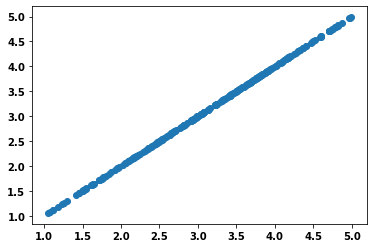

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
y_c = data['ave_voltage'] 
plt.scatter(y_c,y_c)
plt.show()

In [11]:
data = data[data['ave_voltage']< up]
data = data[data['ave_voltage']> dw]

Wall time: 13 ms


In [ ]:
%%time
data.to_csv('id_prop.csv',index=False, header = False)